# CS579: Lecture 02
# Data Collection

<br><br>

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*

<br><br><br><br><br><br>
<br><br><br><br><br><br>

**Today's Goals**
- Give examples of
  - Collecting Twitter data
  - Constructing social graphs with networkx
  - Python tips and tricks
- Discuss the first assignment

# Twitter

- Platform for broadcasting messages.
- https://twitter.com/justinbieber
<br><br><br><br><br><br>

# Twitter Jargon

- **tweet**: A message, max 140 characters
- **timeline**: A list of tweets from a user
- **follower**: If user $A$ follows $B$, $A$ will receive tweets from $B$'s timeline
- **friend**: If $A$ follows $B$, then $B$ is a *friend* of $A$.
  - Notice the asymmetry: If $A$ follows $B$, but $B$ does not follow $A$, then $A$ is not a friend of $B$.

<br><br><br><br><br><br>


# Twitter API

- https://dev.twitter.com/
- Provides programmatic access to *public* Twitter data
  - *direct messages* not included
  - A user can set their timeline to be private, but this is rare.
  
 <br><br><br><br><br><br>


# Twitter API

Two sub-APIs:
- *[REST API](https://dev.twitter.com/docs/api/1.1)*: Submit HTTP requests to access specific information (tweets, friends, ...)
- *[Streaming API](https://dev.twitter.com/docs/api/streaming)*: Open a continuous connection to Twitter to receive real-time data.

These APIs are simply HTTP GET requests:

https://api.twitter.com/1.1/search/tweets.json?q=chicago

<br><br><br><br><br><br>


# Authentication

- Twitter uses [OAuth](https://dev.twitter.com/docs/auth/oauth) to enable secure requests to the API
- After creating an account, you can generate tokens: https://dev.twitter.com/docs/auth/tokens-devtwittercom
- These tokens will be sent with each API request
- Many libraries exist to make this easier: https://dev.twitter.com/docs/twitter-libraries
<br><br><br><br><br><br>


In [68]:
# Create a Twitter connection using TwitterAPI:
#   https://github.com/geduldig/TwitterAPI
# Start with `pip install TwitterAPI`
# You'll need to edit twitter.cfg with your own tokens.
import configparser
from TwitterAPI import TwitterAPI

def get_twitter(config_file):
    """ Read the config_file and construct an instance of TwitterAPI.
    Args:
      config_file ... A config file in ConfigParser format with Twitter credentials
    Returns:
      An instance of TwitterAPI.
    """
    config = configparser.ConfigParser()
    config.read(config_file)
    twitter = TwitterAPI(
                   config.get('twitter', 'consumer_key'),
                   config.get('twitter', 'consumer_secret'),
                   config.get('twitter', 'access_token'),
                   config.get('twitter', 'access_token_secret'))
    return twitter

twitter = get_twitter('twitter.cfg')
print('Established Twitter connection.')

Established Twitter connection.


In [69]:
type(twitter)

TwitterAPI.TwitterAPI.TwitterAPI

In [70]:
# What can we do with this twitter object?
# builtin method `dir` tells us...
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [71]:
# Get help on the `request` method using the builtin method called...`help`
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(resource, params=None, files=None, method_override=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    :param method_override: Request method to override or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [72]:
# Let's start by querying the search API
request = twitter.request('search/tweets', {'q': 'chicago'}) 

In [9]:
# What object is returned?
# builtin type method will tell us.
print(type(request))
dir(request)

<class 'TwitterAPI.TwitterAPI.TwitterResponse'>


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'close',
 'get_iterator',
 'get_rest_quota',
 'headers',
 'json',
 'response',
 'status_code',
 'stream',
 'text']

In [73]:
request.status_code
# See https://dev.twitter.com/overview/api/response-codes

200

In [74]:
for i in [1,2,3]:
    print(i)

1
2
3


In [75]:
print([i*2 for i in [1,2,3]])

[2, 4, 6]


In [76]:
# The __iter__ method means we can loop over this object.
# See https://wiki.python.org/moin/Iterator
tweets = [r for r in request]
# List comprehensions used a lot in Python. See:
# https://docs.python.org/2/tutorial/datastructures.html

In [77]:
print('found %d tweets' % len(tweets))

found 15 tweets


In [78]:
# What is the first tweet?
a_tweet = tweets[0]
type(a_tweet)

dict

In [79]:
# What can we do with dicts?
help(a_tweet)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize s

In [80]:
# Print keys.
a_tweet.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [81]:
# The text.
print(a_tweet['text'])
print(a_tweet['created_at'])

RT @st47ck: Girls From Georgia, Texas , Chicago😩😍
Wed Aug 23 19:16:48 +0000 2017


In [82]:
# What is a user?...another dict
a_tweet['user']

{'contributors_enabled': False,
 'created_at': 'Thu Apr 14 11:58:03 +0000 2016',
 'default_profile': True,
 'default_profile_image': False,
 'description': "God ain't finished with me yet.. 🙏🏾AlbanyStateUniversity 🐏💙💛",
 'entities': {'description': {'urls': []}},
 'favourites_count': 21027,
 'follow_request_sent': False,
 'followers_count': 1079,
 'following': False,
 'friends_count': 702,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 720581882803535872,
 'id_str': '720581882803535872',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 4,
 'location': 'Forsyth, GA',
 'name': 'QC ✨🐐',
 'notifications': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/720581882803535872/1489971160',
 'profile_image_url': 'http://pbs.twimg.com/profile_images/898587267916279809

In [83]:
user = a_tweet['user']
print('screen_name=%s, name=%s, location=%s' % (user['screen_name'], user['name'], user['location']))

screen_name=_miquala97, name=QC ✨🐐, location=Forsyth, GA


In [84]:
# Who follows this person?
# https://dev.twitter.com/docs/api/1.1/get/followers/list
screen_name = user['screen_name']
request = twitter.request('followers/list', {'screen_name': screen_name, 'count':200})
followers = [r for r in request]
        
print('found %d followers for %s' % (len(followers), screen_name))
# See more about paging here: https://dev.twitter.com/docs/working-with-timelines

found 200 followers for _miquala97


In [85]:
type(followers[0])

dict

In [86]:
followers[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'live_following', 'follow_request_sent', 'notifications', 'muting', 'blocking', 'blocked_by', 'translator_type'])

In [87]:
followers[0]['screen_name']

'keylonnnn'

In [88]:
# What happens if we get an error?
request = twitter.request('followers/list',
                          {'screen_name': 'this_is_not_a_valid_screen_name',
                           'count':200})

In [89]:
bad_followers = [r for r in request]

TwitterRequestError: Twitter request failed (404)

In [90]:
request.status_code

404

# Limitations

- Can only search 2 weeks in past
  - But can get up to 3,200 most recent tweets of a user
- Rate limits! https://dev.twitter.com/docs/rate-limiting/1.1/limits
  - e.g., 180 requests in 15 minute window

In [91]:
# Working around rate limits.
def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request.
      params ..... A parameter dictionary for the request.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error: %s \nsleeping for 15 minutes.' % request.text)
            time.sleep(61 * 15)

## Drawing graphs with NetworkX

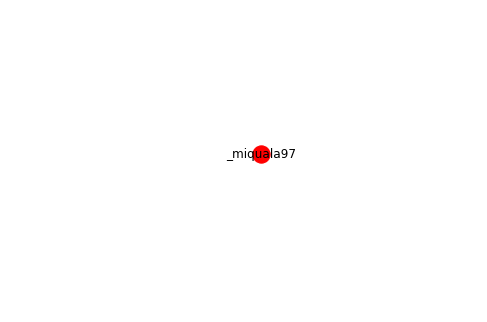

In [92]:
import warnings
warnings.filterwarnings("ignore")
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node(screen_name)
# Draw the graph
nx.draw(graph, with_labels=True)

In [93]:
# Didn't draw anything? Need to place it inline.
import matplotlib.pyplot as plt  
%matplotlib inline
# See many more magic spells:
# http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system

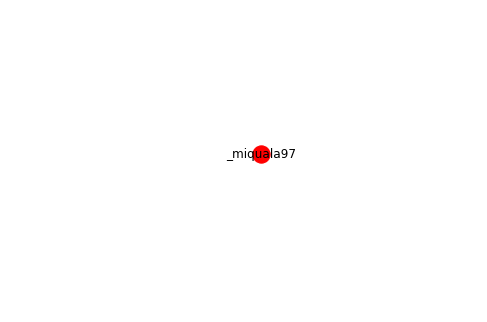

In [94]:
nx.draw(graph, with_labels=True)

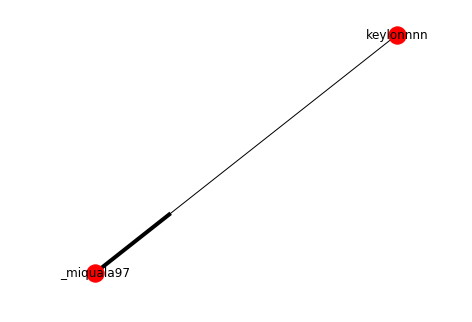

In [95]:
# Add an edge to a follower
graph.add_edge(followers[0]['screen_name'], screen_name)
nx.draw(graph, with_labels=True)

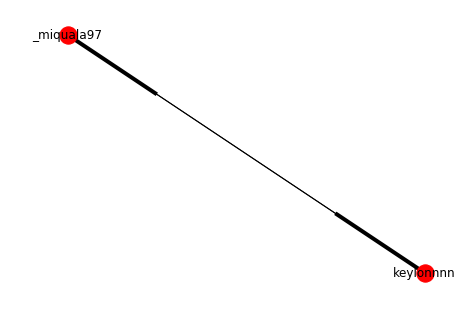

In [96]:
# Make link symmetric.
graph.add_edge(screen_name, followers[0]['screen_name'])
nx.draw(graph, with_labels=True)

In [97]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                                {'screen_name': screen_name,
                                                 'count': 200})]
print('got %d tweets for user %s' % (len(timeline), screen_name))

got 199 tweets for user _miquala97


** Why not 200? **

In [98]:
# Print the text.
print('\n'.join(t['text'] for t in timeline))

RT @Tyonna_Moss: and you'll never be last. https://t.co/3TyXhIZdCC
RT @st47ck: Girls From Georgia, Texas , Chicago😩😍
RT @Symphonynyy: Hey big head😊 https://t.co/XDrC05GL5a
RT @kaytrendyme_: i'm a tomboy &amp; girly girl but mostly tomboy
RT @D_EssenceG: Absolutely in love with my classroom! https://t.co/HXSvEd2QTO
RT @okMute: Fuck small talk, be straight up with me
Ready to be done for today 🤦🏽‍♀️
RT @iSPRINT_SUMM: I don't get enough sleep 😭
RT @DillTrill_: I'm the person alone at the bottom https://t.co/X4LCtEJPZw
RT @OmgQuan: 🗣 I LOVE NATURAL BEAUTY ! FUCK YOUR MAKEUP AND YOUR FOUNDATION. I THINK WOMEN MUCH MORE ELEGANT WITHOUT ALL THAT EXTRA BS 😩😍😋❗️
RT @tamir1_: social media got y'all folks heads messed up
RT @youhdaay: i hate disrespectful kids , it's not funny or cute 🙄
RT @VlNCHY: Bitch i'm just tryna see https://t.co/4W7wDmLWsF
RT @JalenBush22: It's almost safe to say the best way to live life is to not have expectations from anybody.
RT @sexualgifs_: what in the hannah montana

In [43]:
from collections import Counter  # This is just a fancy dict mapping from object->int, starting at 0.
c = Counter()
c.update([1,2,1])
print(c)
c.update([1,2,1])
print(c)

Counter({1: 2, 2: 1})
Counter({1: 4, 2: 2})


In [99]:
# Count words
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())  # to lower case; split on whitespace.
print('found %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

found 1050 unique terms in 199 tweets


[('rt', 166),
 ('i', 67),
 ('the', 35),
 ('you', 35),
 ('to', 34),
 ('a', 24),
 ('my', 24),
 ('be', 18),
 ('and', 17),
 ('if', 16)]

In [100]:
list(counts.keys())[0]

'rt'

In [102]:
sorted([5,4,-10,-1], key=lambda x: -x)

[5, 4, -1, -10]

In [103]:
sorted([('joe', 10), ('mary', 20), ('jim', 15), ('joe', 5)],
      key=lambda x: -x[1])

[('mary', 20), ('jim', 15), ('joe', 10), ('joe', 5)]

In [104]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

print('\n'.join('%s=%d' % (item[0], item[1]) 
                 for item in sorted_counts))

rt=166
i=67
the=35
you=35
to=34
a=24
my=24
be=18
and=17
if=16
in=15
when=15
this=15
for=14
don't=14
that=13
on=13
shit=12
with=11
your=11
what=11
i'm=10
all=10
just=10
is=10
&amp;=9
up=9
get=8
y'all=8
bitch=8
they=8
want=8
fuck=7
me=7
say=7
how=7
do=7
ya=7
ass=7
of=7
never=6
love=6
not=6
it=6
@_miquala97=6
no=6
her=6
she=6
@tyonna_moss:=5
🤦🏽‍♀️=5
😭=5
at=5
@omgquan:=5
go=5
was=5
ain't=5
look=5
lil=5
put=5
can=5
feel=5
nigga=5
so=5
done=4
sleep=4
think=4
it's=4
life=4
about=4
going=4
gotta=4
now=4
nobody=4
gone=4
im=4
need=4
you.=4
wanna=4
fucking=4
he=4
said=4
😂=4
one=4
that's=4
are=4
albany=4
stupid=4
...=4
from=3
,=3
big=3
more=3
without=3
got=3
hate=3
or=3
see=3
@jalenbush22:=3
way=3
find=3
off=3
first=3
back=3
still=3
even=3
left=3
.=3
any=3
@igvess_jimi:=3
🙃=3
play=3
dnt=3
asf=3
friends=3
these=3
thank=3
🙏🏾=3
lame=3
than=3
am=3
because=3
help=3
should=3
like=3
baby=3
some=3
then=3
always=3
u=3
everything=3
out=3
every=3
hey=2
tomboy=2
but=2
straight=2
ready=2
today=2
alone=2
!=2
ex

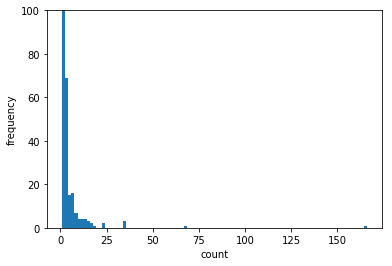

In [105]:
# Plot these counts.
import matplotlib.pyplot as plt
plt.hist(list(counts.values()), bins=100)
plt.xlabel('count')
plt.ylabel('frequency')
plt.ylim((0,100))
plt.show()

**Zipf's Law**: (roughly) there are many rare words; there are a small number of extremely frequent words.

Alternatively:   
The frequency of a term is inversely proportional to its rank.

Let $f_i$ be the frequency of the $i$th most common term.

$ f_i \propto \frac{1}{i} $ 

equivalently

$ f_i = k$ $i^b $ for constant $k$ and $b=-1$

In [106]:
freqs = sorted(counts.values(), reverse=True)
freqs[:10]

[166, 67, 35, 35, 34, 24, 24, 18, 17, 16]

In [115]:
ranks = list(range(1, len(freqs)+1))

In [110]:
# Minimize mean squared error to find best value of k
from scipy.optimize import curve_fit
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        c

In [112]:
# Define the Zipf function and fit the k parameter.
def zipfs(i, k):
    return k / i
zipf_parms,covar = curve_fit(zipfs, ranks, freqs)
print('Zipf fit is %.2f*T^-1' % zipf_parms[0])

Zipf fit is 159.57*T^-1


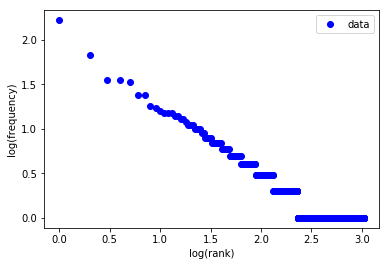

In [113]:
# Try a log-log plot.
import numpy as np
l_ranks = np.log10(ranks)
l_freqs = np.log10(freqs)
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.legend(loc='best')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')

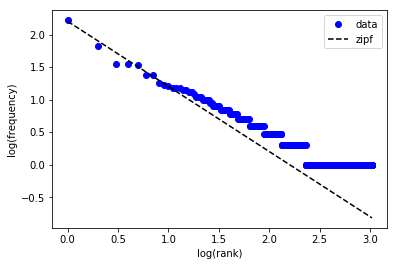

In [114]:
plt.plot(l_ranks, l_freqs, 'bo', label='data')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.plot(l_ranks, np.log10(zipfs(ranks, *zipf_parms)), 'k--', label='zipf')  # k-- = black dashed line
plt.legend(loc='best')